In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr, skew, pearsonr, spearmanr

male = np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=1, dtype=float)
female = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1, dtype=float)

In [2]:
# Add BMI column to both matrices
def calculate_bmi(weight, height):
    return weight / ((height / 100) ** 2)

male_bmi = calculate_bmi(male[:, 0], male[:, 1])
female_bmi = calculate_bmi(female[:, 0], female[:, 1])

# Round BMI values
male_bmi = np.round(male_bmi, 2)
female_bmi = np.round(female_bmi, 2)

# Add BMI column to matrices
male = np.column_stack((male, male_bmi))
female = np.column_stack((female, female_bmi))

I calculate BMI and add both of them to the final column.

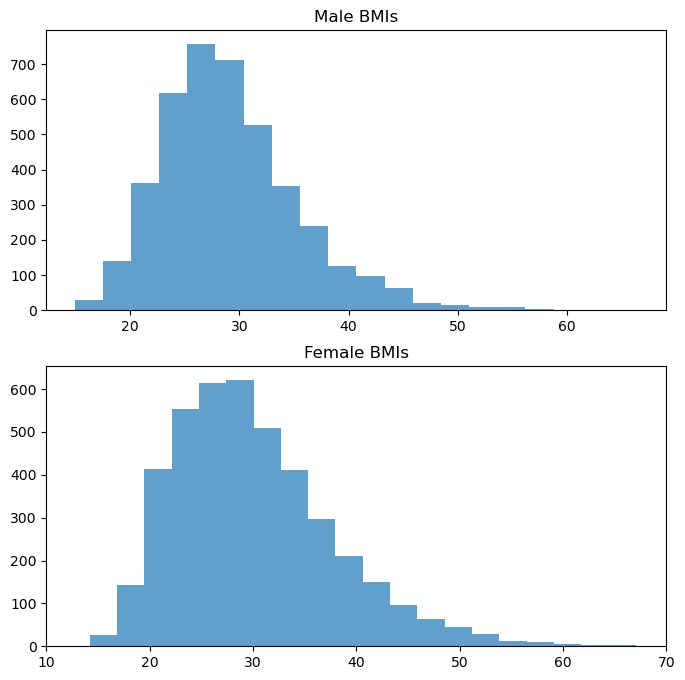

In [3]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [2, 2]})

# Plot male BMI histogram
axs[0].hist(male[:, -1], bins=20, alpha=0.7)
axs[0].set_title('Male BMIs')

# Plot female BMI histogram
axs[1].hist(female[:, -1], bins=20, alpha=0.7)
axs[1].set_title('Female BMIs')

# Set common x-axis limits
plt.xlim(10, 70)  # Adjust the limits as per your data range

# Show the plot
plt.show()

I use height ratio to customize the height of histograms to be similar to the sample.

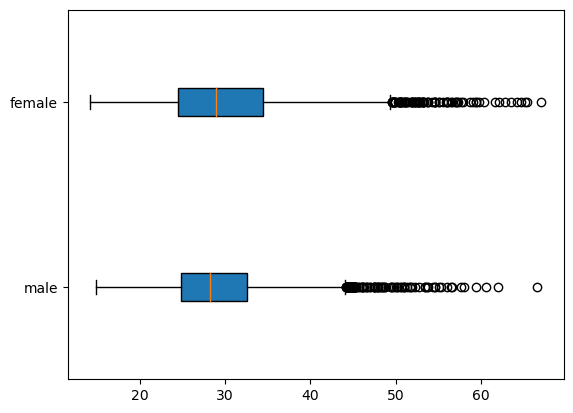

In [4]:
# Combine male and female BMIs into a list
bmi_data = [male_bmi, female_bmi]

# Create a box-and-whisker plot
plt.boxplot(bmi_data, labels=['male', 'female'], vert=False, patch_artist=True)

# Show the plot
plt.show()

I combine two BMIs, and I use boxplot function to create a box-and-whisker plot based on label to draw male and female BMIs.

In [5]:
# Compute basic numerical aggregates
male_stats = {
    'BMI mean': np.mean(male[:, -1]),
    'median': np.median(male[:, -1]),
    'min': np.min(male[:, -1]),
    'max': np.max(male[:, -1]),
    'std': np.std(male[:, -1]),
    'IQR': iqr(male[:, -1]),
    'skew': skew(male[:, -1])
}

female_stats = {
    'BMI mean': np.mean(female[:, -1]),
    'median': np.median(female[:, -1]),
    'min': np.min(female[:, -1]),
    'max': np.max(female[:, -1]),
    'std': np.std(female[:, -1]),
    'IQR': iqr(female[:, -1]),
    'skew': skew(female[:, -1])
}

# Print the results
print("##\t\tfemale  male")
for key in male_stats:
    print(f"## {key.ljust(10)}\t{female_stats[key]:.2f}\t{male_stats[key]:.2f}")

##		female  male
## BMI mean  	30.10	29.14
## median    	28.89	28.27
## min       	14.20	14.91
## max       	67.04	66.50
## std       	7.76	6.31
## IQR       	10.01	7.73
## skew      	0.92	0.97


The mean and median values are slightly higher for females compared to males, suggesting a potential rightward skewness.

Both distributions are positively skewed, but the male BMI distribution is slightly more skewed to the right.

The female BMI distribution has higher standard deviation and IQR, indicating greater dispersion or spread compared to the male BMI distribution.

The range of BMI values is comparable between males and females.

In [46]:
# Extract the relevant columns
selected_zdata = male[:, :]

# Calculate column means and standard deviations
column_means = np.mean(selected_zdata, axis=0)
column_stddevs = np.std(selected_zdata, axis=0)

# Standardize the data to create z-scores
zmale = np.round(((selected_zdata - column_means) / column_stddevs), 3)

# Display the standardized matrix
print(zmale[:, :])

[[ 0.487  1.106  1.143 ...  0.303  1.125  0.093]
 [-0.657  1.354  0.774 ... -0.819 -0.906 -1.148]
 [ 0.716  1.497  3.196 ...  0.271  0.472  0.167]
 ...
 [ 0.954 -0.669 -0.253 ...  1.106  0.781  1.44 ]
 [-0.414  0.336  0.117 ... -0.385 -0.284 -0.569]
 [-1.338 -0.826  0.445 ... -1.146 -0.9   -1.246]]


I create a new matrix zmale which is a version of the male dataset with each of its eight columns standardised. According to the formula that standardises data by subtracting column means and dividing by standard deviations, I calculate the means and standard deviations. Following that, I round that calculation value to 2 floats.

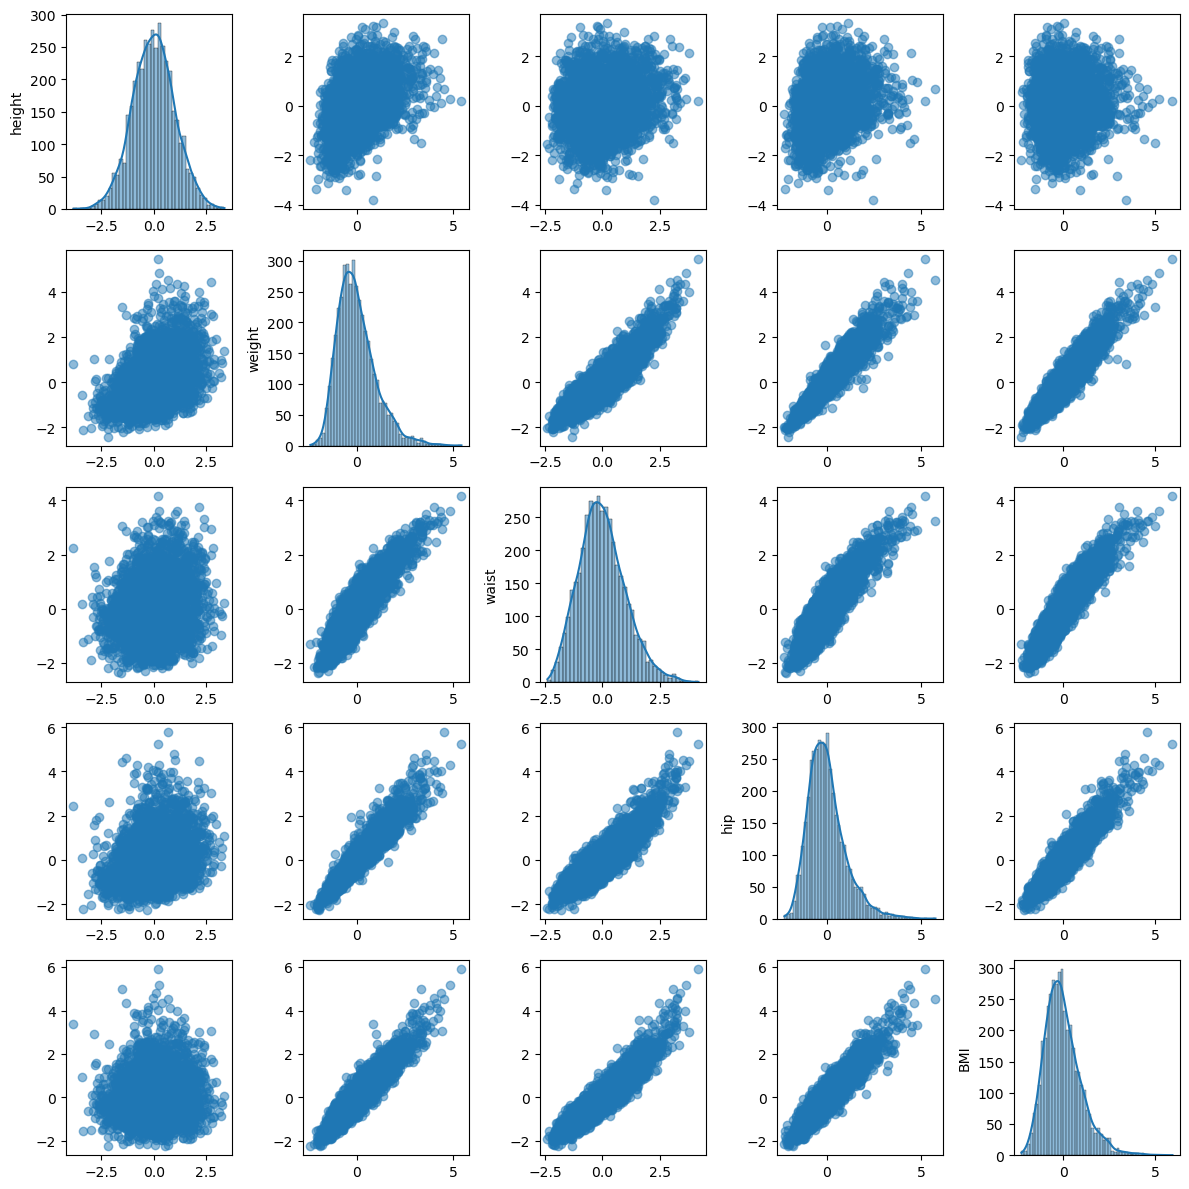

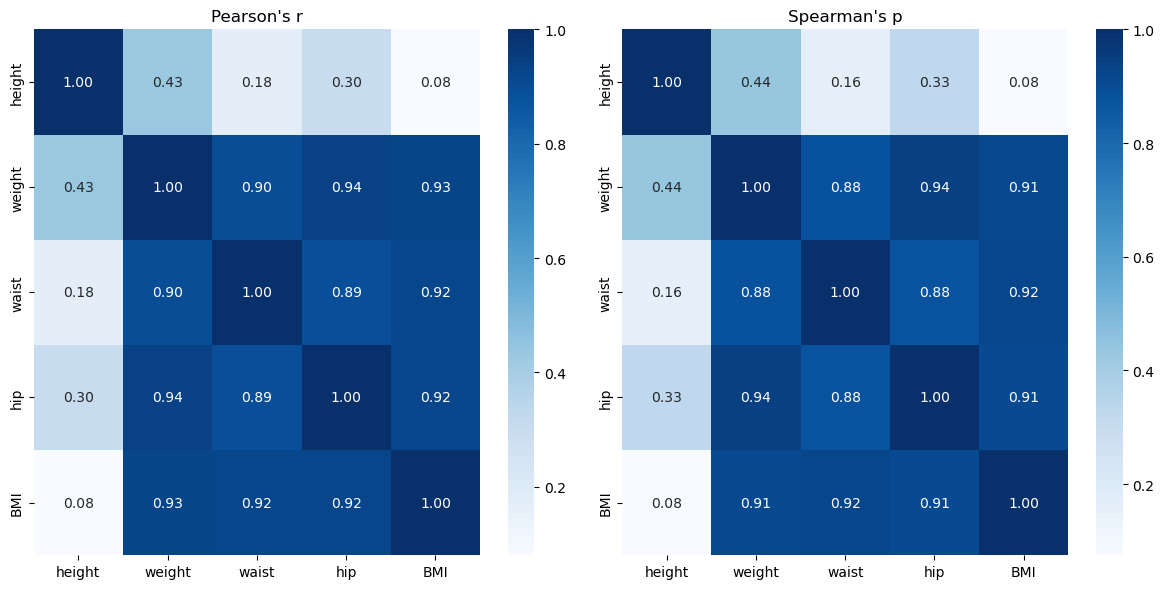

In [48]:
#Subtask 8
# Extract the relevant columns
columns_of_interest = [1, 0, 6, 5, -1]  # 1: height, 0: weight, 6: waist circumference, 5: hip circumference, -1: BMI
selected_zdata = zmale[:, columns_of_interest]

# Create a list of column names
column_names = ['height', 'weight', 'waist', 'hip', 'BMI']

# Create a pairplot
num_columns = selected_zdata.shape[1]
fig, axes = plt.subplots(nrows=num_columns, ncols=num_columns, figsize=(12, 12))

for i in range(num_columns):
    for j in range(num_columns):
        if i == j:
            # Diagonal elements: Histograms
            sns.histplot(selected_zdata[:, i], kde=True, ax=axes[i, i])
            axes[i, i].set_ylabel(column_names[i])
        else:
            # Scatterplots
            axes[i, j].scatter(selected_zdata[:, j], selected_zdata[:, i], alpha=0.5)

plt.tight_layout()
plt.show()

#Subtask 9
# Compute Pearson's correlation matrix
zpearson_corr_matrix = np.corrcoef(selected_zdata, rowvar=False)

# Compute Spearman's correlation matrix
zspearman_corr_matrix, _ = spearmanr(selected_zdata)

# Function to annotate the heatmaps with correlation coefficients
def annotate_heatmap(ax, data):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center')

# Create subplots for Pearson's and Spearman's correlation heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pearson's correlation heatmap
sns.heatmap(zpearson_corr_matrix, annot=True, fmt=".2f", cmap=plt.colormaps.get_cmap("Blues"), cbar=True, xticklabels=column_names, yticklabels=column_names, ax=axes[0])
axes[0].set_title("Pearson's r")

# Spearman's correlation heatmap
sns.heatmap(zspearman_corr_matrix, annot=True, fmt=".2f", cmap=plt.colormaps.get_cmap("Blues"), cbar=True, xticklabels=column_names, yticklabels=column_names, ax=axes[1])
axes[1].set_title("Spearman's p")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The code for this task is almost the same as subtasks 8-10. However, the parameters used are those of zmale.

The scatterplot matrix provides a visual confirmation of potential relationships seen in the correlation coefficients.

Strong positive correlations between weight and other variables are expected. 0.94 percent is the highest positive correlation between weight and hip circumference.

Correlation coefficients offer a quantitative measure of the strength and direction of relationships. Positive coefficients indicate a positive association, while negative coefficients indicate a negative association.

Outliers in the data may influence Pearson's correlation more than Spearman's, as Spearman's is less sensitive to extreme values.

The correlation coefficients and scatterplot matrix together can help in understanding the interplay between variables and guide further analysis or investigations.